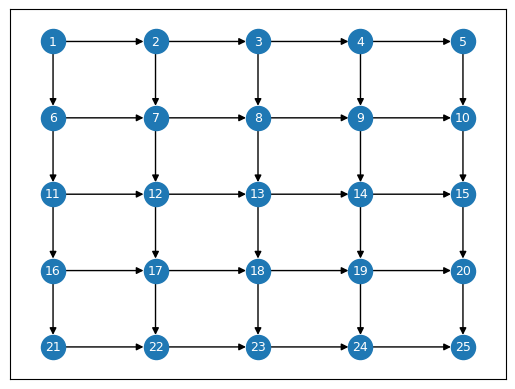

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

In [1]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(4):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0
nb_entries :  1
nb_entries :  2
nb_entries :  3
nb_entries :  4
nb_entries :  5
nb_entries :  6
nb_entries :  7
nb_entries :  8
nb_entries :  9
nb_entries :  10
nb_entries :  11
nb_entries :  12
nb_entries :  13
nb_entries :  14
nb_entries :  15
nb_entries :  16
nb_entries :  17
nb_entries :  18
nb_entries :  19
nb_entries :  20
nb_entries :  21
nb_entries :  22
nb_entries :  23
nb_entries :  24
nb_entries :  25
nb_entries :  26
nb_entries :  27
nb_entries :  28
nb_entries :  29
nb_entries :  30
nb_entries :  31
nb_entries :  32
nb_entries :  33
nb_entries :  34
nb_entries :  35
nb_entries :  36
nb_entries :  37
nb_entries :  38
nb_entries :  39
nb_entries :  40
nb_entries :  41
nb_entries :  42
nb_entries :  43
nb_entries :  44
nb_entries :  45
nb_entries :  46
nb_entries :  47
nb_entries :  48
nb_entries :  49
nb_entries :  50
nb_entries :  51
nb_entries :  52
nb_entries :  53
nb_entries :  54
nb_entries :  55
nb_entries :  56
nb_entries :  57
nb_entries :  58
nb_entr

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [1]:
%run utils.py

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
Network

,~,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;,link_id
0,NaN,1,2,2000,40,0.6,0.15,4,60,0,0,;,0
1,NaN,2,1,2000,40,0.6,0.15,4,60,0,0,;,1
2,NaN,1,6,2000,40,0.6,0.15,4,60,0,0,;,2
3,NaN,6,1,2000,40,0.6,0.15,4,60,0,0,;,3
4,NaN,2,3,2000,40,0.6,0.15,4,60,0,0,;,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,23,22,2000,40,0.6,0.15,4,60,0,0,;,75
76,NaN,23,24,2000,40,0.6,0.15,4,60,0,0,;,76
77,NaN,24,23,2000,40,0.6,0.15,4,60,0,0,;,77
78,NaN,24,25,2000,40,0.6,0.15,4,60,0,0,;,78


In [ ]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print(count2)

In [5]:
# from utils import *
from tqdm import tqdm
%run utils.py

# This file contains 385 OD matrix
a_file = open('stats_40000_1.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
# print(Network)

time = 0
for val in tqdm(list(stats.values())):
    for OD_matrix in val :
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Output/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/185 [00:00<?, ?it/s]

0
model solved in: 0.433513879776001
1
model solved in: 0.36432886123657227
2
model solved in: 0.37925219535827637
3
model solved in: 0.3503139019012451
4
model solved in: 0.35323190689086914
5
model solved in: 0.3732280731201172
6
model solved in: 0.3664860725402832
7
model solved in: 0.34531307220458984
8
model solved in: 0.3410649299621582
9
model solved in: 0.3515472412109375
10
model solved in: 0.3700380325317383
11
model solved in: 0.34325194358825684
12
model solved in: 0.46599698066711426
13
model solved in: 0.45232105255126953
14
model solved in: 0.3591799736022949
15
model solved in: 0.3573000431060791
16
model solved in: 0.3472902774810791
17
model solved in: 0.34401893615722656
18
model solved in: 0.3568379878997803
19
model solved in: 0.3413660526275635
20
model solved in: 0.3476247787475586
21
model solved in: 0.35279273986816406
22
model solved in: 0.3479459285736084
23
model solved in: 0.39096975326538086
24
model solved in: 0.3646430969238281
25
model solved in: 0.3516